<a href="https://colab.research.google.com/github/ddodds42/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/DAVID_DODDS_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [17]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [18]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [19]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [20]:
# Data reconoissance!
df.head()

bathrooms  bedrooms              created  \
0        1.5         3  2016-06-24 07:54:24   
1        1.0         2  2016-06-12 12:19:27   
2        1.0         1  2016-04-17 03:26:41   
3        1.0         1  2016-04-18 02:22:02   
4        1.0         4  2016-04-28 01:32:41   

                                         description      display_address  \
0  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
1                                                         Columbus Avenue   
2  Top Top West Village location, beautiful Pre-w...          W 13 Street   
3  Building Amenities - Garage - Garden - fitness...     East 49th Street   
4  Beautifully renovated 3 bedroom flex 4 bedroom...    West 143rd Street   

   latitude  longitude  price           street_address interest_level  ...  \
0   40.7145   -73.9425   3000  792 Metropolitan Avenue         medium  ...   
1   40.7947   -73.9667   5465      808 Columbus Avenue            low  ...   
2   40.7388   -74.0018   2850          241 W 13 Street           high  ...   
3   40.7539   -73.9677   3275     333 East 49th Street            low  ...   
4   40.8241   -73.9493   3350    500 West 143rd Street            low  ...   

   high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
0                    0        0              0                 0        0   
1                    0        0              0                 0        0   
2                    0        0              0                 0        0   
3                    0        0              0                 0        0   
4                    0        0              0                 0        0   

   exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
0          0     0             0                  0                     0  
1          0     0             0                  0                     0  
2          0     0             0                  0                     0  
3          0     0             0                  0                     0  
4          0     0             0                  0                     0  

[5 rows x 34 columns]

In [21]:
# Data espionage!
df.describe()

bathrooms      bedrooms      latitude     longitude         price  \
count  48818.000000  48818.000000  48818.000000  48818.000000  48818.000000   
mean       1.201790      1.537158     40.750756    -73.972758   3579.560982   
std        0.470707      1.106078      0.038962      0.028887   1762.420875   
min        0.000000      0.000000     40.571200    -74.087300   1375.000000   
25%        1.000000      1.000000     40.728300    -73.991800   2500.000000   
50%        1.000000      1.000000     40.751700    -73.978000   3150.000000   
75%        1.000000      2.000000     40.774000    -73.955000   4095.000000   
max       10.000000      8.000000     40.989400    -73.700100  15500.000000   

           elevator  cats_allowed  hardwood_floors  dogs_allowed  \
count  48818.000000  48818.000000     48818.000000  48818.000000   
mean       0.524827      0.478266         0.478266      0.447622   
std        0.499388      0.499533         0.499533      0.497254   
min        0.000000      0.000000         0.000000      0.000000   
25%        0.000000      0.000000         0.000000      0.000000   
50%        1.000000      0.000000         0.000000      0.000000   
75%        1.000000      1.000000         1.000000      1.000000   
max        1.000000      1.000000         1.000000      1.000000   

            doorman  ...  high_speed_internet       balcony  swimming_pool  \
count  48818.000000  ...         48818.000000  48818.000000   48818.000000   
mean       0.424843  ...             0.087201      0.060469       0.055205   
std        0.494324  ...             0.282133      0.238357       0.228382   
min        0.000000  ...             0.000000      0.000000       0.000000   
25%        0.000000  ...             0.000000      0.000000       0.000000   
50%        0.000000  ...             0.000000      0.000000       0.000000   
75%        1.000000  ...             0.000000      0.000000       0.000000   
max        1.000000  ...             1.000000      1.000000       1.000000   

       new_construction       terrace     exclusive          loft  \
count      48818.000000  48818.000000  48818.000000  48818.000000   
mean           0.051907      0.046192      0.043304      0.042710   
std            0.221842      0.209903      0.203542      0.202204   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      0.000000      0.000000      0.000000   
75%            0.000000      0.000000      0.000000      0.000000   
max            1.000000      1.000000      1.000000      1.000000   

       garden_patio  wheelchair_access  common_outdoor_space  
count   48818.00000       48818.000000          48818.000000  
mean        0.03933           0.027224              0.026240  
std         0.19438           0.162736              0.159851  
min         0.00000           0.000000              0.000000  
25%         0.00000           0.000000              0.000000  
50%         0.00000           0.000000              0.000000  
75%         0.00000           0.000000              0.000000  
max         1.00000           1.000000              1.000000  

[8 rows x 29 columns]

In [22]:
# Can't help myself but to think that larger floats would be better for linear
# regression that 1's and 0's. Or even sub-5 integers. So voila! I have
# engineered a new feature! The total su of bedrooms and bathrooms.
creature_comfort_spaces = df.bathrooms + df.bedrooms + df.laundry_in_unit + df.dining_room + df.balcony + df.terrace + df.loft + df.garden_patio
creature_comfort_spaces

0        4.5
1        3.0
2        2.0
3        2.0
4        5.0
        ... 
49347    4.0
49348    2.0
49349    2.0
49350    1.0
49351    3.0
Length: 48818, dtype: float64

In [23]:
# Checking to make sure that this new feature is included in the data frame.
df['Creature_Comfort_Spaces'] = creature_comfort_spaces
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space',
       'Creature_Comfort_Spaces'],
      dtype='object')

In [24]:
# Wayyyy over on the right...
df.head()

bathrooms  bedrooms              created  \
0        1.5         3  2016-06-24 07:54:24   
1        1.0         2  2016-06-12 12:19:27   
2        1.0         1  2016-04-17 03:26:41   
3        1.0         1  2016-04-18 02:22:02   
4        1.0         4  2016-04-28 01:32:41   

                                         description      display_address  \
0  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
1                                                         Columbus Avenue   
2  Top Top West Village location, beautiful Pre-w...          W 13 Street   
3  Building Amenities - Garage - Garden - fitness...     East 49th Street   
4  Beautifully renovated 3 bedroom flex 4 bedroom...    West 143rd Street   

   latitude  longitude  price           street_address interest_level  ...  \
0   40.7145   -73.9425   3000  792 Metropolitan Avenue         medium  ...   
1   40.7947   -73.9667   5465      808 Columbus Avenue            low  ...   
2   40.7388   -74.0018   2850          241 W 13 Street           high  ...   
3   40.7539   -73.9677   3275     333 East 49th Street            low  ...   
4   40.8241   -73.9493   3350    500 West 143rd Street            low  ...   

   balcony  swimming_pool  new_construction  terrace  exclusive  loft  \
0        0              0                 0        0          0     0   
1        0              0                 0        0          0     0   
2        0              0                 0        0          0     0   
3        0              0                 0        0          0     0   
4        0              0                 0        0          0     0   

   garden_patio  wheelchair_access  common_outdoor_space  \
0             0                  0                     0   
1             0                  0                     0   
2             0                  0                     0   
3             0                  0                     0   
4             0                  0                     0   

   Creature_Comfort_Spaces  
0                      4.5  
1                      3.0  
2                      2.0  
3                      2.0  
4                      5.0  

[5 rows x 35 columns]

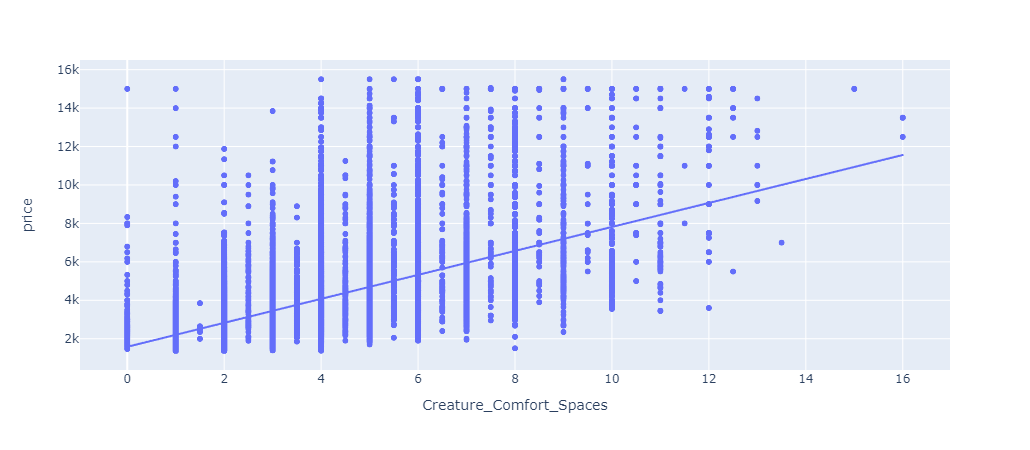

In [25]:
# Plotly is love. Plotly is life. Here's how Creature_Comfort_Spaces and rental
# price plot against one another.
import plotly.express as px
px.scatter(df, x='Creature_Comfort_Spaces', y='price', trendline='ols')

In [26]:
# Enter Sci-Kit learn...
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
# Training the data. Creature_Comfort_Spaces to predict monthly rental price.
# Because data is sentient and needs to exercise.
feature = ['Creature_Comfort_Spaces']
target = 'price'
X_train = df[feature]
y_train = df[target]
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#  Here is what the model predicts would be the renatal price of some 
# Creature_Comfort_Space configurations not seen in the data.
import numpy
unseen = [0.5, 14, 14.5, 15.5, 16.5, 17]
for c in unseen:
  X_test = [[c]]
  y_pred = model.predict(X_test)
  print(f"An apartment with a configuration of {c} Creature Comfort Spaces is likely to cost about ${y_pred[0]:,.0f} per month.")

An apartment with a configuration of 0.5 Creature Comfort Spaces is likely to cost about $1,892 per month.
An apartment with a configuration of 14 Creature Comfort Spaces is likely to cost about $10,312 per month.
An apartment with a configuration of 14.5 Creature Comfort Spaces is likely to cost about $10,624 per month.
An apartment with a configuration of 15.5 Creature Comfort Spaces is likely to cost about $11,247 per month.
An apartment with a configuration of 16.5 Creature Comfort Spaces is likely to cost about $11,871 per month.
An apartment with a configuration of 17 Creature Comfort Spaces is likely to cost about $12,183 per month.


In [34]:
def rent(rooms):
    X_test = [[rooms]]
    y_pred = model.predict(X_test)
    print(f"An apartment with a configuration of {rooms} Creature Comfort Spaces is likely to cost about ${y_pred[0]:,.0f} per month.")

Here is a function that predicts that rent of an apartment with x number of creature comfort spaces. It would plug in nicely to an applet for people seeking apartments...

In [33]:
rent(6)

An apartment with a configuration of 6 Creature Comfort Spaces is likely to cost about $5,322 per month.


In [29]:
# The coefficient of the regression line.
model.coef_

array([623.73141821])

In [30]:
# The y-intercept of the regression line.
model.intercept_

1579.6417886489307

In [31]:
# A legible formula for the model's regression line.
m = model.coef_[0]
b = model.intercept_
print(f'rent = ${m:,.0f}*Creature_Comfort_Spaces + ${b:,.0f}')

rent = $624*Creature_Comfort_Spaces + $1,580


I don't quite understand how 0 bedroom, 0 bathroom apartments could leagally be allowed on the rental market, but they exist, as the "y-intercept", and the model predicts that they are likely to rent out for $$1,580 per month in Williamsburg, Brooklyn. The model's coefficient of 624 suggests that, for each room added to an apartment, the rent will increase by $624.

... and up next is a multiple regression to predict the price of rent. Maybe it can be more accurate when bedrooms and bathrooms are their own dimensions...

In [37]:
# Because data is sentient and needs to exercise.
features = ['bedrooms','bathrooms']
target = 'price'
X_train = df[features]
y_train = df[target]
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
model.predict([[1,1]])

array([2949.12187934])

In [56]:
rooms = range(1,10,1)

for r in rooms:
  X_test = [[r,r]]
  y_pred = model.predict(X_test)
  print(f"An apartment with {r} bedrooms and {r} bathrooms is likely to cost about ${y_pred[0]:,.0f} per month.")

An apartment with 1 bedrooms and 1 bathrooms is likely to cost about $2,949 per month.
An apartment with 2 bedrooms and 2 bathrooms is likely to cost about $5,433 per month.
An apartment with 3 bedrooms and 3 bathrooms is likely to cost about $7,918 per month.
An apartment with 4 bedrooms and 4 bathrooms is likely to cost about $10,402 per month.
An apartment with 5 bedrooms and 5 bathrooms is likely to cost about $12,886 per month.
An apartment with 6 bedrooms and 6 bathrooms is likely to cost about $15,370 per month.
An apartment with 7 bedrooms and 7 bathrooms is likely to cost about $17,855 per month.
An apartment with 8 bedrooms and 8 bathrooms is likely to cost about $20,339 per month.
An apartment with 9 bedrooms and 9 bathrooms is likely to cost about $22,823 per month.


# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [x] Look at the data. Choose a feature, and plot its relationship with the target.
- [x] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [x] Define a function to make new predictions and explain the model coefficient.
- [x] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [x] Do linear regression with two or more features.
- [x] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [x] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?